# Titanic Data set

# Exploratory Data Analysis (EDA)

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [31]:
data = pd.read_csv("train.csv")

In [32]:
data.shape

(891, 12)

In [33]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
# Checking for total null values 
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
#Cabin, Age and Embarked have null values
#Now fix these columns

### How many Survived?

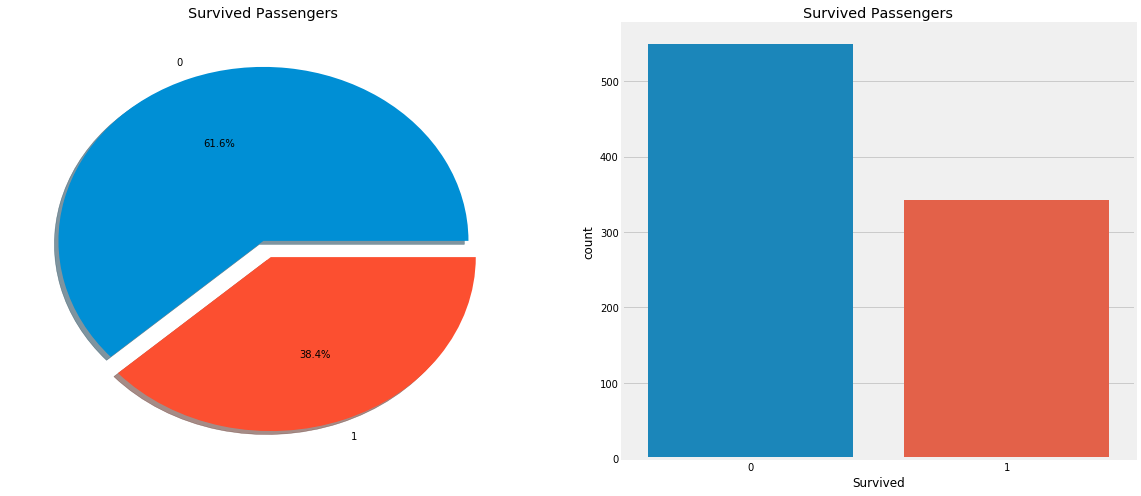

In [7]:
# Lets plot the The total percentage and count of the passengers Survied
#  and died in Titanic using pie and count plot
fig, axes = plt.subplots(1,2, figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode= [0,0.1],autopct='%1.1f%%', ax =axes[0],shadow=True)
axes[0].set_title('Survived Passengers')
axes[0].set_ylabel('')
sns.countplot('Survived', data= train, ax= axes[1])
axes[1].set_title('Survived Passengers')
plt.show()

From the above Plot we can easily see that very less amount of people survived in the insident.
Only 38 % people survived majority of them died. In the later session we will see that which passenger are survied and do differnt comparisons on different features, i.e. Age, Embarcation, Sex, port etc.

### Categorical Features

In [36]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

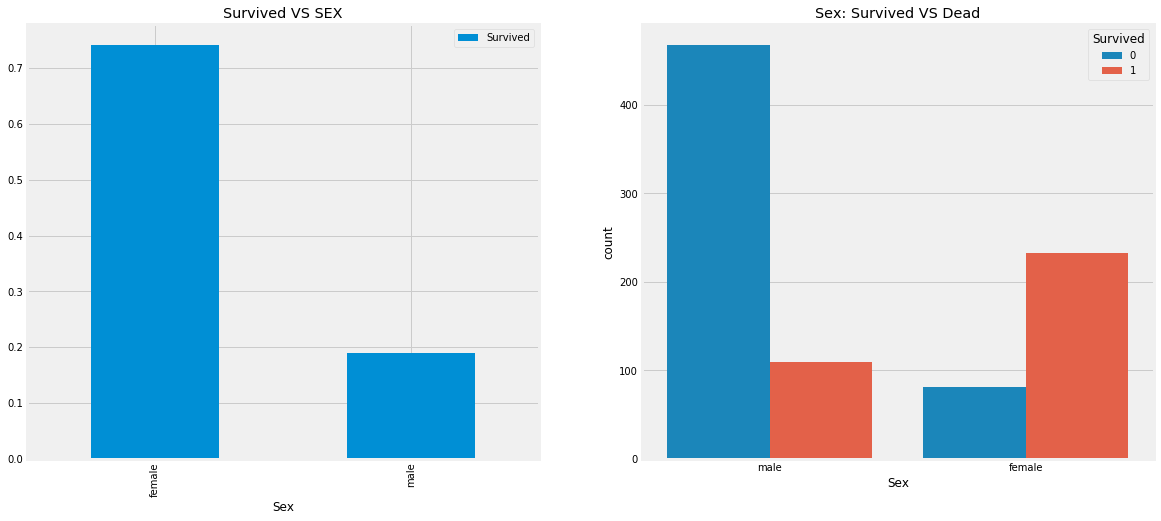

In [37]:
fig, ax = plt.subplots(1,2,figsize= (18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived VS SEX')
sns.countplot('Sex',hue='Survived', data=data,ax=ax[1])
ax[1].set_title('Sex: Survived VS Dead')
plt.show()

### Ordinal Features


In [38]:
pd.crosstab(data.Pclass,data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


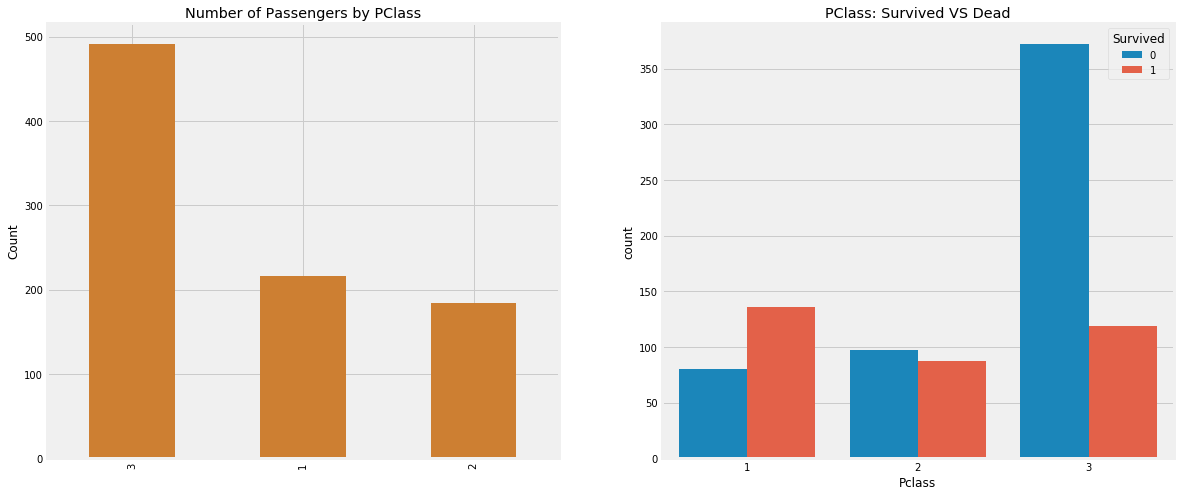

In [39]:
fig , ax = plt.subplots(1,2, figsize = (18,8))
data['Pclass'].value_counts().plot.bar(color= ['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers by PClass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data = data, ax=ax[1])
ax[1].set_title('PClass: Survived VS Dead')
plt.show()

As we can see clearly from the Plot that the people with Class 1 #tag buisness class have greater survival rate whereas the number of passengers in class  is very less as compared to Third Class.


In [40]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

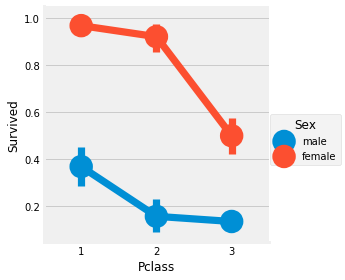

In [41]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

 Looking at the Factorplot and CrossTab, we can see that the Survival rate f the womens are grater than the men. The thing to note here is the Survival rate of the women at PClass1 is aroung 96 %.
 It is also evident that in the resue operation womens are given the first pirority. Even men from the PClass1 has a very low Survival rate as compared to PClass1 Women.
    

### Continuous Features

In [42]:
print ('Oldest passenger is:', data['Age'].max(), 'Years old')
print ('Youngest Passenger is: ', data['Age'].min(), 'Years old')
print ('Average age of the people:', data['Age'].mean(), 'Years')

Oldest passenger is: 80.0 Years old
Youngest Passenger is:  0.42 Years old
Average age of the people: 29.69911764705882 Years


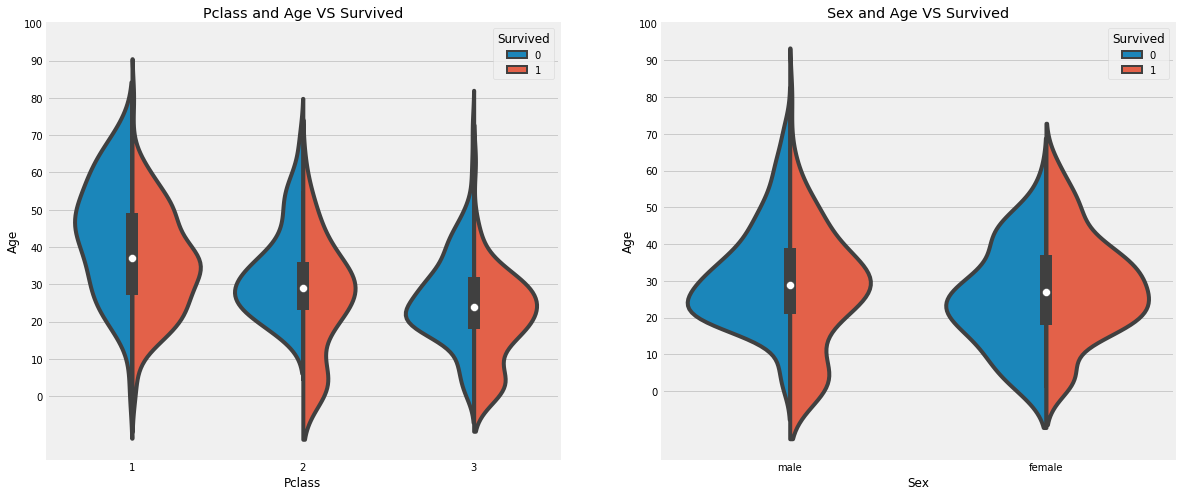

In [43]:
fig, ax = plt.subplots(1,2, figsize= (18,8))
sns.violinplot("Pclass","Age" , hue = "Survived", data = data, split=True, ax=ax[0])
ax[0].set_title("Pclass and Age VS Survived")
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex", "Age", hue ="Survived", data = data, split=True, ax =ax[1])
ax[1].set_title("Sex and Age VS Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

As we can see from the above plot the survival of the children increases with the increase in the Pclass. This shows that atleast this not dependent on money class.
    The Survival rate for the Pclass 1 men are greater, even the women has better then men.
    The survival rate for men decreases with the increase in the age.


As we have seen earlier that in Age column there are 177 NULL values. So we have to fix this. One thing we can do id to put the mean of the Age in all the NULL column. But as we can see from the data that we als have children and people with different Ages, this mean methos will gonna put mean value also in the children age , which is not right. So we see , can we deal with this problem.
In the Name feature we also have salutation like (Mr, Mrs.), so now we check for the title and then put the mean in accordance with that.

In [44]:
data['initial']=0
for i in data:
    data['initial'] =  data.Name.str.extract('([A-Za-z]+)\.')

In [45]:
# Checking the initials with the sex
pd.crosstab(data.initial, data.Sex).T.style.background_gradient(cmap='summer_r')

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


we have some salutations that are missplelled so, now we gonna fix them all.

In [46]:
data['initial'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',
                          'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'], ['Mr', 'other', 'Mrs', 'Mr', 
                                                                                   'Mr', 'other', 'Mrs', 'Mr', 'Mr',
                                                                                   'Miss', 'Miss', 'Miss', 'Mr', 'Mrs',
                                                                                   'Miss', 'other', 'Mr'], inplace=True)

In [47]:
# lets check the average age with salutaion
data.groupby('initial')['Age'].mean()

initial
Miss     21.860000
Mr       30.461056
Mrs      35.981818
other    45.888889
Name: Age, dtype: float64

In [48]:
### Filling the NAN columns
data.loc[(data.Age.isnull()) & (data.initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.initial == 'other'), 'Age'] = 46

In [49]:
# check if any value in Age is null or not.
data.Age.isnull().any()

False

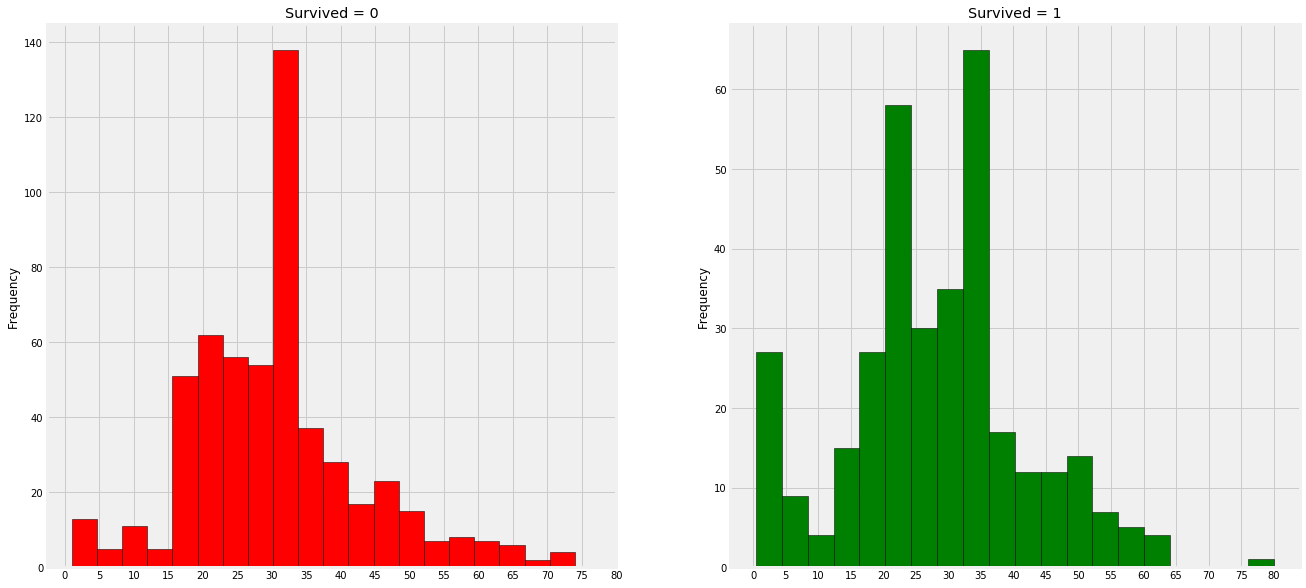

In [50]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins =20, edgecolor='black', color ='green')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(x1)
plt.show()

- less the 5 years old were saved in a large amount. (women, childern saving policy).
- A we can see that one 80 year old was also saved.
- The majority of death figure lies between 20-40 years old people.

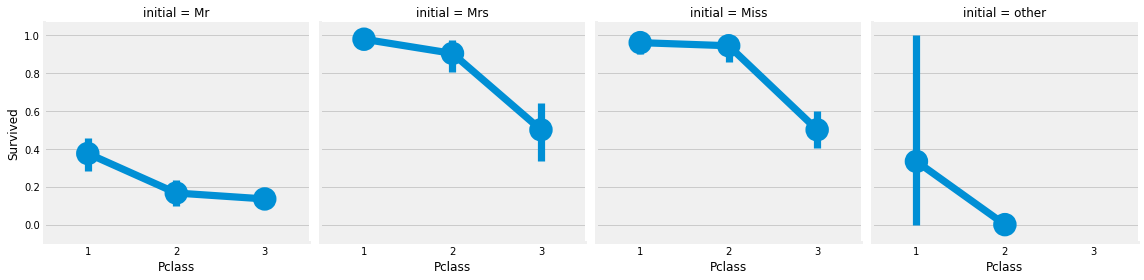

In [55]:
sns.factorplot('Pclass', 'Survived', col='initial', data=data)
plt.tight_layout()
plt.show()

As we can see from the plot that the women and children first policy remians irrespect of the class

### Embarked ==> Categorical value

In [56]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

### Chances for Survival by port of Embarkation


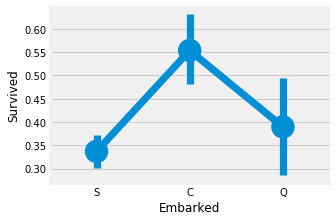

In [57]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chances for the survival fo embarked c is highest and for c is lowest 

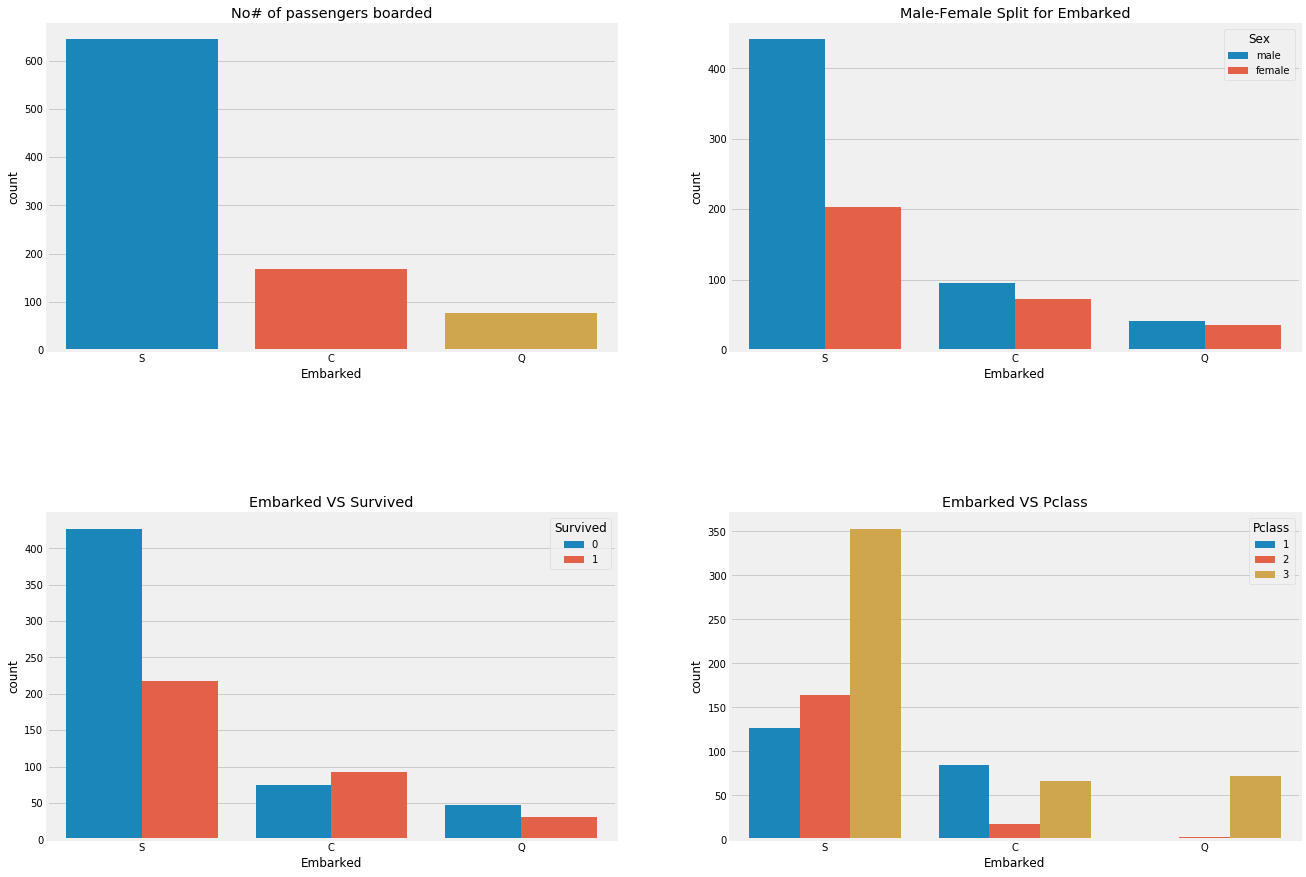

In [62]:
fig , ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No# of passengers boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax = ax[1,0])
ax[1,0].set_title('Embarked VS Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked VS Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- As we can see that majority of the passengers are boarded in the Embarked S whereas Embarked  has least
- From the Second plot we can see that the split of male and female in Embarked is not same. In case of the Embarked C and Q the split proportion is almost the same, whereas in S male are double in amount then female passengers
- Due do the same reason the survial is almost the same. In Embarked S the survival is half the amount of death whereas in the case of C and Q the survival the death rate is almost the same. We can also say that because of large amount of people in Embarked S, the survival rate is low where as in C the survial rate is grater than the the casualities.
- in the plot 4 we can see that in the Embarked S the maximum amount of passengers are from Plcass 3.

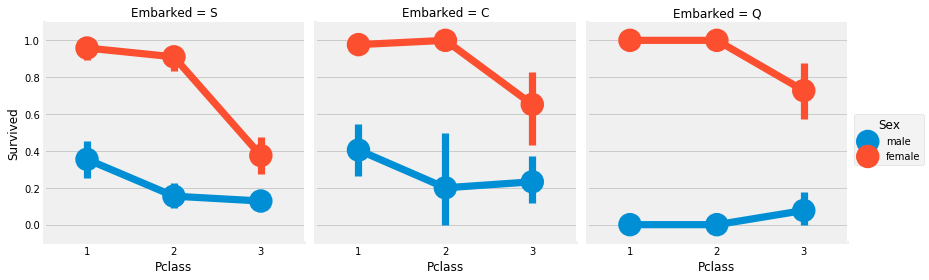

In [63]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

- As we can see that the survival rate for female categors is geater that regardless of the Pcalss and Embarked
- Embarked S looks very unlucky to Pclass 3 because the survival rate is very low in both men and women as compared to tge amount of people in Plcass 3. As we can see clearly that the reason for low rate in the Plcass is because of Pclass 1 or called a buisness class prople.


### Filling the Embarked null values

In [64]:
data['Embarked'].fillna('S', inplace=True)

In [65]:
data.Embarked.isnull().any()

False